In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:
weight = ctrl.Antecedent(np.arange(0, 1001, 1), 'weight')
food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'food_type')
temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'temperature')

cooking_time = ctrl.Consequent(np.arange(0, 21, 1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 101, 1), 'power_level')


In [ ]:
weight['light'] = fuzz.trimf(weight.universe, [0, 0, 300])
weight['medium'] = fuzz.trimf(weight.universe, [200, 500, 800])
weight['heavy'] = fuzz.trimf(weight.universe, [600, 1000, 1000])

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['medium'] = fuzz.trimf(food_type.universe, [0, 1, 2])
food_type['hard'] = fuzz.trimf(food_type.universe, [1, 2, 2])

temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 30, 50])
temperature['hot'] = fuzz.trimf(temperature.universe, [40, 60, 60])

cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 0, 7])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [5, 10, 15])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [12, 20, 20])

power_level['low'] = fuzz.trimf(power_level.universe, [0, 0, 40])
power_level['medium'] = fuzz.trimf(power_level.universe, [30, 60, 80])
power_level['high'] = fuzz.trimf(power_level.universe, [60, 100, 100])


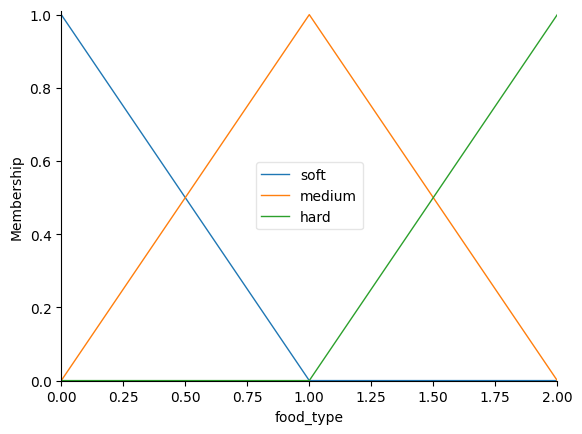

In [ ]:
food_type.view()

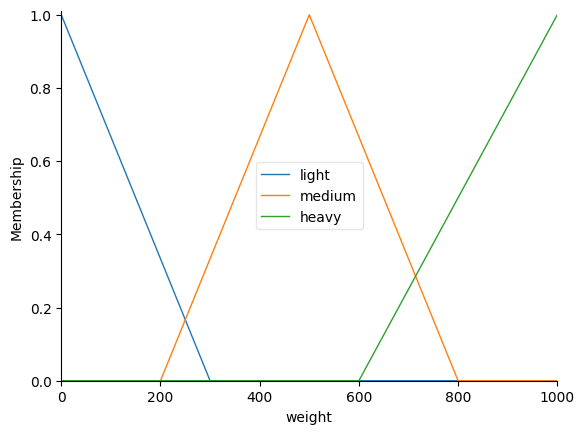

In [ ]:
weight.view()

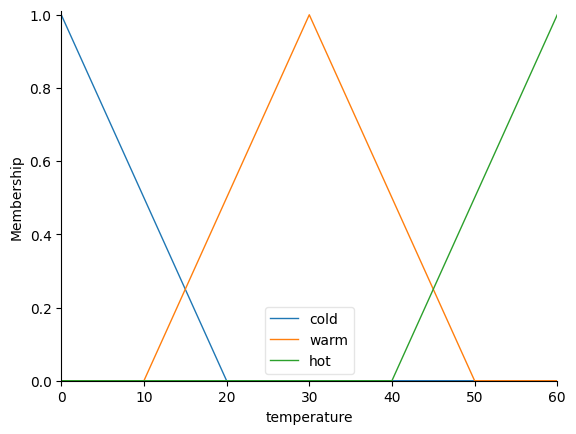

In [ ]:
temperature.view()

In [ ]:
rule1 = ctrl.Rule(weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(weight['heavy'], cooking_time['long'])

rule4 = ctrl.Rule(food_type['soft'], power_level['low'])
rule5 = ctrl.Rule(food_type['medium'], power_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], power_level['high'])

rule7 = ctrl.Rule(temperature['cold'], cooking_time['long'])
rule8 = ctrl.Rule(temperature['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(temperature['hot'], cooking_time['short'])

rule10 = ctrl.Rule(weight['heavy'] & food_type['hard'] & temperature['cold'],
                   (cooking_time['long'], power_level['high']))
rule11 = ctrl.Rule(weight['medium'] & food_type['soft'] & temperature['warm'],
                   (cooking_time['medium'], power_level['low']))
rule12 = ctrl.Rule(weight['light'] & food_type['medium'] & temperature['hot'],
                   (cooking_time['short'], power_level['medium']))


In [ ]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
system = ctrl.ControlSystemSimulation(control_system)


system.input['weight'] = 500
system.input['food_type'] = 1
system.input['temperature'] = 20

system.compute()

print(f"Cooking Time: {system.output['cooking_time']:.2f} minutes")
print(f"Power Level: {system.output['power_level']:.2f}%")


Cooking Time: 10.00 minutes
Power Level: 56.67%
